Name-Gaurav Pareek
Batch-DS2308


Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/dsrscientist/dataset4
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv


In [1]:
# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df=pd.read_csv('Grades.csv')

In [3]:
df.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [4]:
df.shape

(571, 43)

In [5]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [6]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
# checking data null values
df.isnull().sum().sum()

425

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

           Missing Values  % Missing data
CS-406                 85       14.886165
CS-412                 79       13.835377
CS-423                 14        2.451839
CS-414                 13        2.276708
CS-419                 13        2.276708
CS-317                 12        2.101576
CS-421                 12        2.101576
CS-403                 12        2.101576
TC-383                 10        1.751313
EF-303                 10        1.751313
HS-304                 10        1.751313
CS-301                 10        1.751313
CS-302                 10        1.751313
CS-312                 10        1.751313
MT-442                 10        1.751313
MT-331                  9        1.576182
EL-332                  9        1.576182
CS-318                  9        1.576182
CS-306                  9        1.576182
EE-222                  7        1.225919
MT-224                  7        1.225919
CS-210                  7        1.225919
CS-212                  6        1

In [9]:
# checking data duplicacy
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [11]:
df.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

Data Cleaning

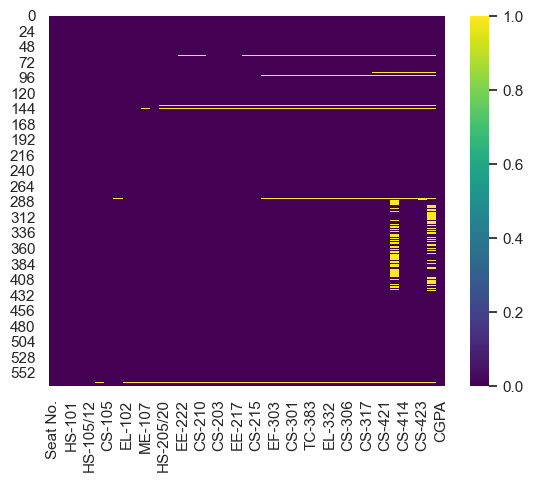

In [12]:
# Check if there is any missing value

sns.heatmap(df.isnull(), cmap='viridis')
plt.show()
    

Discover and Visualize the Data to Gain Insights:


Histogram

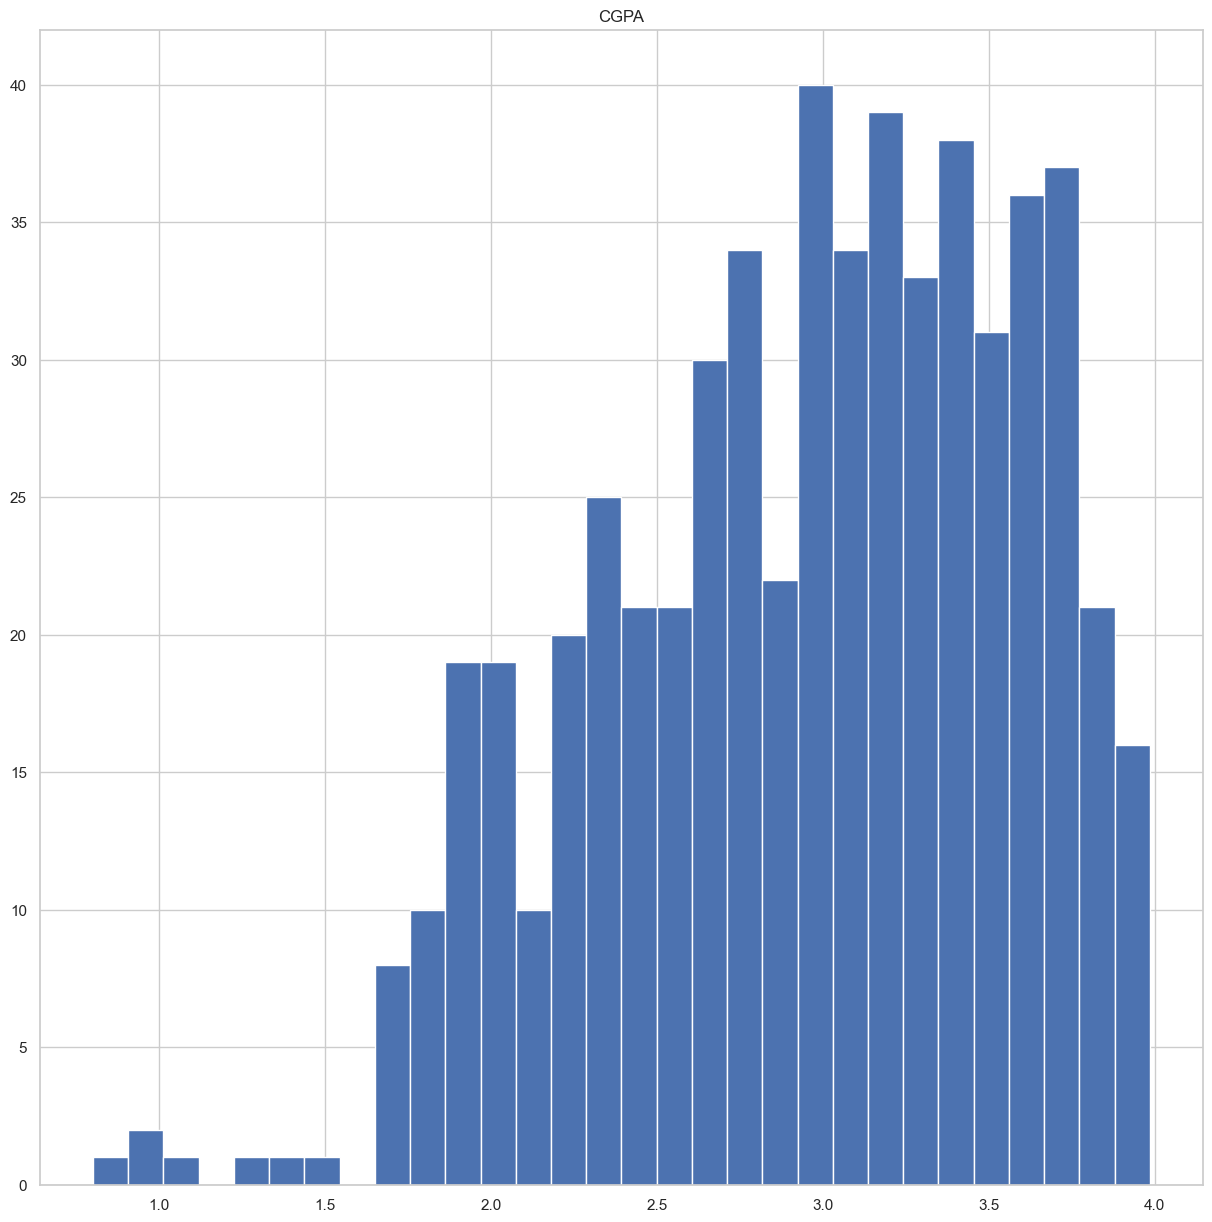

In [15]:
df.hist(bins=30,figsize=(15,15))
plt.show()
     

In [17]:
#encoding
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


In [18]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [19]:
X = df.drop('CGPA', axis=1)
y = df['CGPA']


In [20]:
X

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0           0       5      10       8          6       8      10       9   
1           1       0       9      10          9       5       6       9   
2           2       0       3       0          5       4       0       5   
3           3       9       7      10          9       9       2      10   
4           4       2       2       2          4       0       0       2   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566       566       3       0       0          2       1       0       2   
567       567       1       0       0          0       0       0       0   
568       568       3       0       2          4       0       0       0   
569       569       0       4       9          0       9      10       5   
570       570       6       9       9          6       6      10       3   

     EL-102  EE-119  ...  CS-306  CS-312  CS-317  CS-403  CS-421  CS-406  \
0         8       5  ...       6       8       8       8       8       2   
1         0      10  ...       9      10       9       6       9       2   
2         4       2  ...       2       3       3       0       6       0   
3         8       9  ...       8      10       6      10       8       5   
4         4       0  ...       2       5       4       4       5       2   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       2       1  ...       4       2       2       0       0       0   
567       2       0  ...       2       4       4       0       0       2   
568       0       0  ...       4       2       3       0       4       0   
569       8       5  ...       4       9       3       3       8       9   
570       7       6  ...      10       7       6       5       9      11   

     CS-414  CS-419  CS-423  CS-412  
0         0       8       3       2  
1         5       6       6       3  
2         0       0       2       0  
3         3       7       7       7  
4         0       2       2       0  
..      ...     ...     ...     ...  
566       4       4       3       0  
567       3       2       6       2  
568       6       4       2       2  
569       6       3       5       6  
570       8       4       9       8  

[571 rows x 42 columns]

In [21]:

input = df.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = df[["CGPA"]]

In [22]:
target.head()
    

CGPA
0  2.205
1  2.008
2  3.608
3  1.906
4  3.448

In [23]:

pd.unique(df["PH-121"])

array([ 5,  0,  9,  2,  4,  3,  7,  6,  8, 10, 12,  1, 11])

In [24]:
grades_enc = {'B-':2.7, 'A':4, 'D':1.0, 'A-':3.7, 'B+':3.4, 'B':3.0, 'C+':2.4, 'C':2.0, 'C-':1.7, 'D+':1.4, 'WU':0.0, 
              'A+':4,'F':1}

In [25]:


type(input)
     


pandas.core.frame.DataFrame

In [26]:

for item in input:
      input[item] = input[item].replace(grades_enc)

input.head()
     

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0       5      10       8          6       8      10       9       8       5   
1       0       9      10          9       5       6       9       0      10   
2       0       3       0          5       4       0       5       4       2   
3       9       7      10          9       9       2      10       8       9   
4       2       2       2          4       0       0       2       4       0   

   ME-107  ...  EF-303  HS-304  CS-301  CS-302  TC-383  EL-332  CS-318  \
0       8  ...       7       7       3       6       7       6       8   
1       9  ...       8       8       2      10       8       6       2   
2       2  ...       6       0       4       2       3       4       2   
3       7  ...       8       5       9       5      10      10       4   
4       2  ...       7       2       5       2       7       2       5   

   CS-306  CS-312  CS-317  
0       6       8       8  
1       9      10       9  
2       2       3       3  
3       8      10       6  
4       2       5       4  

[5 rows x 33 columns]

In [27]:


# Concating inputs and targets for data insights
df = pd.concat([input, target], axis=1)

     


Discover and Visualize the Data to Gain Insights:

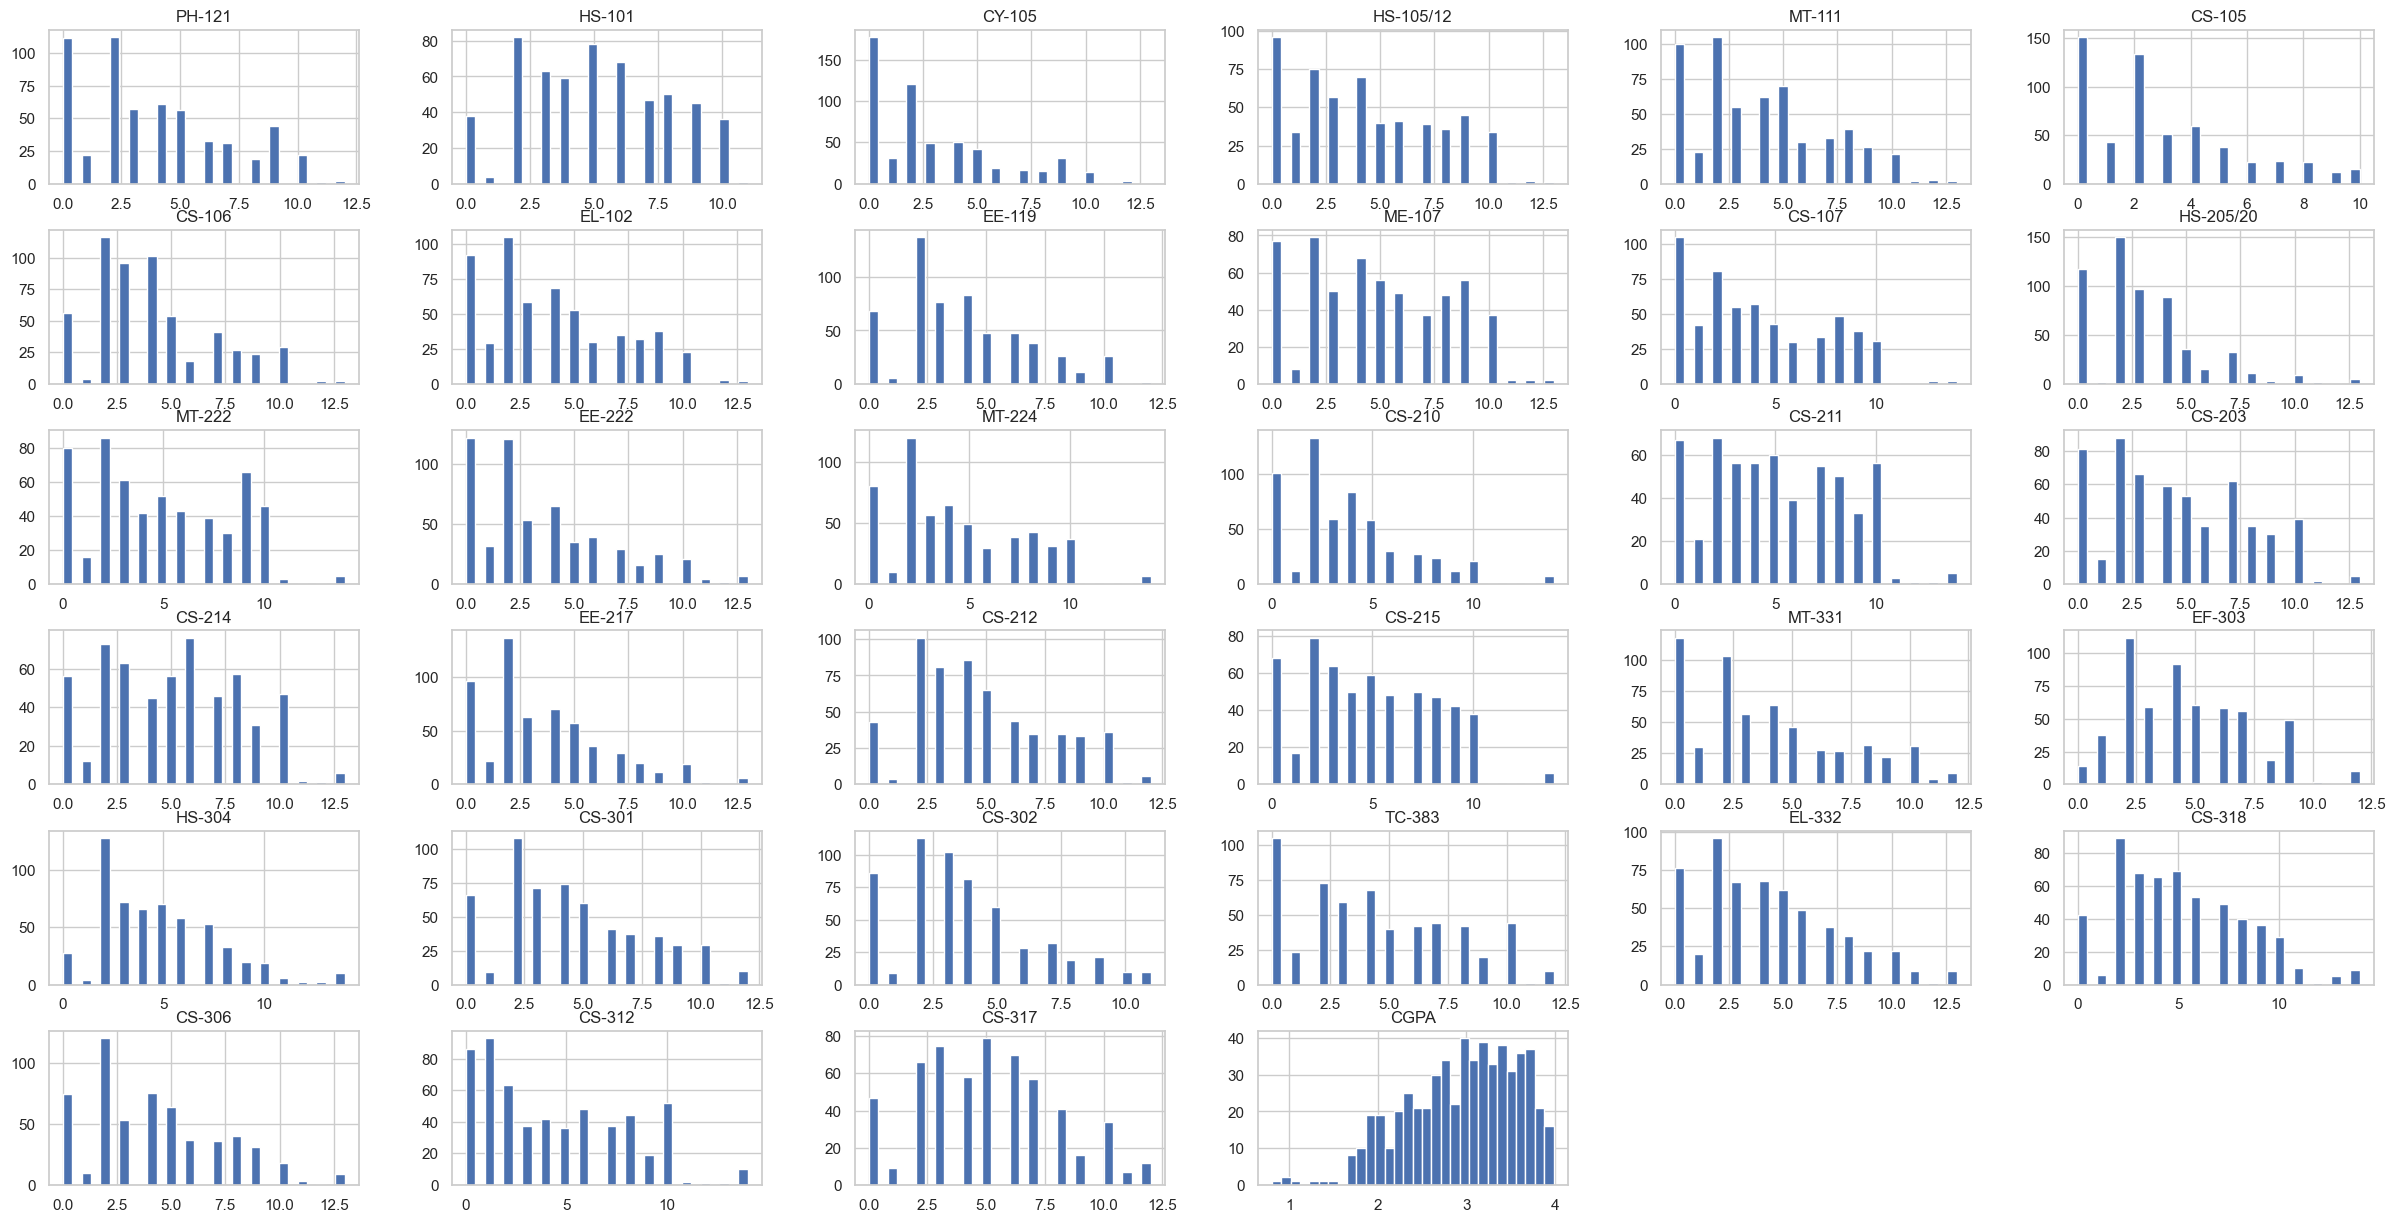

In [28]:


df.hist(bins=30,figsize=(30,15))
plt.show()
     



Looking for Correlations

<AxesSubplot:>

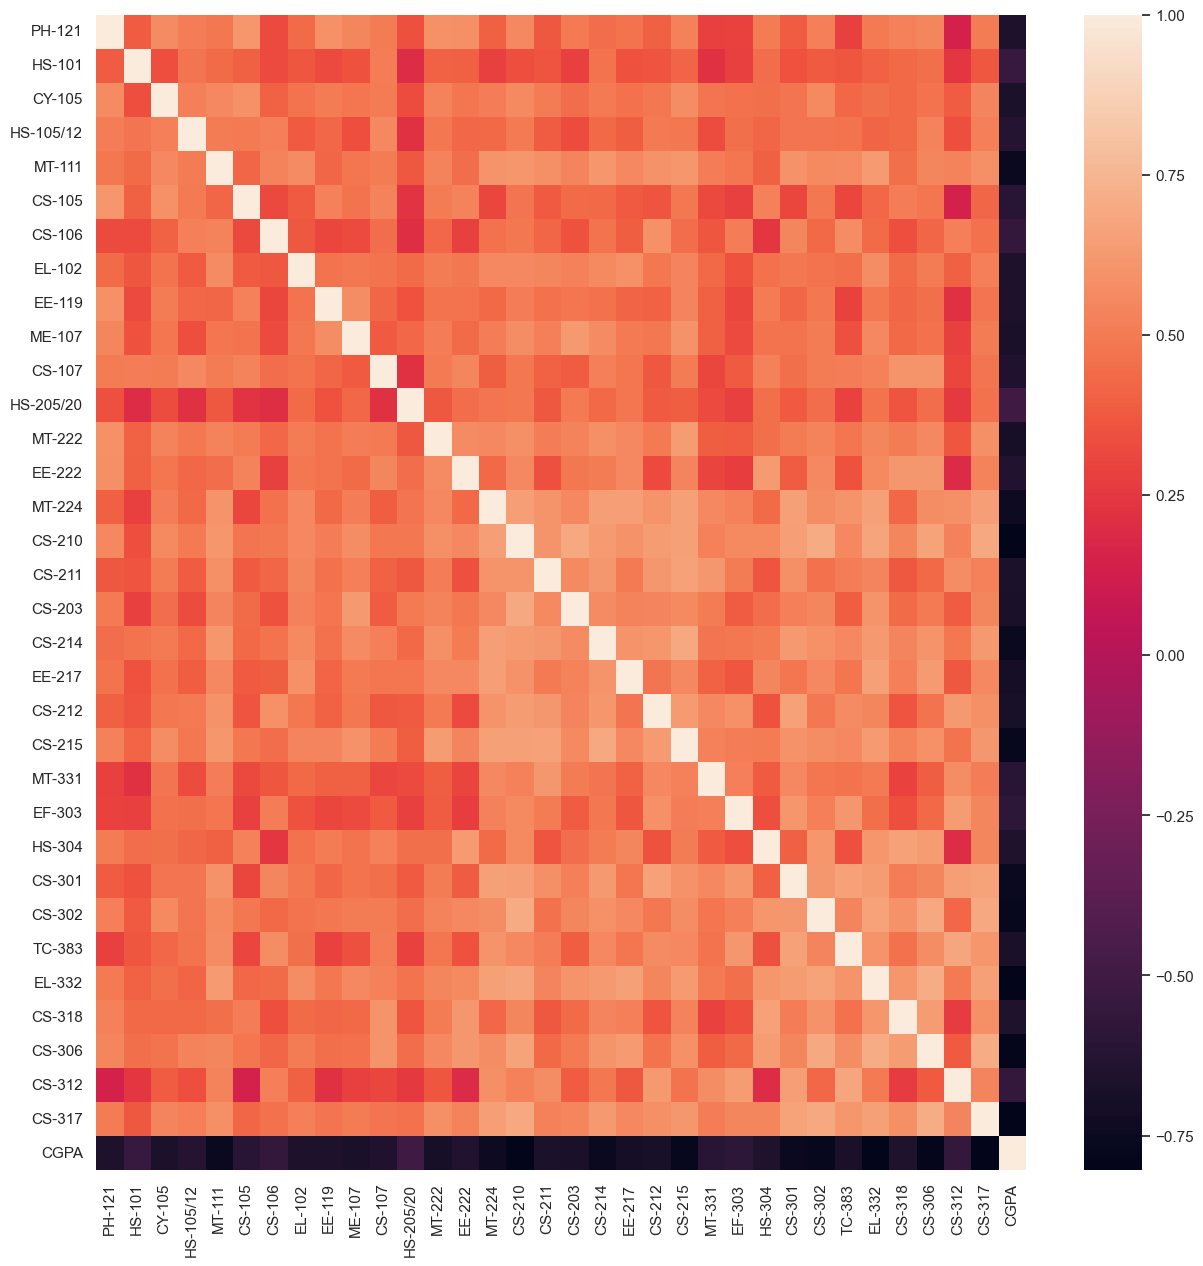

In [29]:


# Looking for correlations
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())
     


In [30]:


df.describe()
     


PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.781086    5.071804    2.921191    4.264448    3.935201    2.838879   
std      3.046895    2.785317    2.992228    3.216478    3.034481    2.696709   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    2.000000    0.000000   
50%      3.000000    5.000000    2.000000    4.000000    4.000000    2.000000   
75%      6.000000    7.000000    5.000000    7.000000    6.000000    4.000000   
max     12.000000   11.000000   13.000000   13.000000   13.000000   10.000000   

           CS-106      EL-102      EE-119      ME-107  ...      HS-304  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     4.161121    3.998249    3.921191    4.817863  ...    4.726795   
std      2.774311    3.075939    2.698100    3.179170  ...    2.914387   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    2.000000   
50%      4.000000    4.000000    3.000000    5.000000  ...    4.000000   
75%      6.000000    6.000000    6.000000    8.000000  ...    7.000000   
max     13.000000   13.000000   12.000000   13.000000  ...   14.000000   

           CS-301      CS-302      TC-383      EL-332      CS-318      CS-306  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     4.394046    3.691769    4.316988    4.302977    5.080560    4.280210   
std      3.003606    2.680584    3.305929    3.101382    3.147902    3.049638   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.000000    2.000000    2.000000    3.000000    2.000000   
50%      4.000000    3.000000    4.000000    4.000000    5.000000    4.000000   
75%      6.000000    5.000000    7.000000    6.000000    7.000000    6.000000   
max     12.000000   11.000000   12.000000   13.000000   14.000000   13.000000   

           CS-312      CS-317        CGPA  
count  571.000000  571.000000  571.000000  
mean     4.299475    4.982487    2.954888  
std      3.580108    2.927134    0.620552  
min      0.000000    0.000000    0.800000  
25%      1.000000    3.000000    2.538000  
50%      4.000000    5.000000    3.029000  
75%      7.000000    7.000000    3.451000  
max     14.000000   12.000000    3.985000  

[8 rows x 34 columns]

In [31]:


df.to_csv('cleaned_data.csv')
     


In [32]:


# Splitting file into different columns based on our model prediction requirement
model1_columns = []
model2_columns = []
model3_columns = []
for item in [input]:
 for i in item:
   if i[3]=='1':
    model1_columns.append(i)
   elif i[3]=='2':
    model2_columns.append(i)
   else:
    model3_columns.append(i)

model2_columns = model1_columns + model2_columns
model3_columns = model2_columns + model3_columns
     



Prepare the data for Linear Regression:
Model 1: Predict final CGPA based on GPs of first year only.

In [33]:


# Input data
labels = df['CGPA'].values
features = df[list(model1_columns)].values

     


In [34]:


# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
     


In [35]:
# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_1 = linear_model.LinearRegression()

# Train the Model
lr_1.fit(X_train, y_train)

LinearRegression()

In [36]:
y_test

array([3.06 , 1.906, 2.328, 3.22 , 3.365, 2.696, 2.925, 3.114, 2.378,
       3.107, 3.332, 3.759, 2.595, 2.971, 3.481, 3.33 , 2.86 , 2.823,
       3.24 , 3.271, 2.087, 3.074, 3.443, 2.406, 3.334, 3.607, 2.942,
       3.772, 2.468, 2.655, 2.053, 2.564, 2.298, 2.264, 3.226, 2.034,
       3.043, 3.068, 3.831, 3.164, 2.791, 3.623, 2.196, 2.8  , 3.624,
       3.211, 3.033, 2.188, 3.174, 2.028, 3.458, 2.785, 1.876, 2.57 ,
       3.063, 3.055, 2.687, 2.359, 3.605, 3.873, 2.253, 3.182, 2.552,
       3.908, 3.325, 3.54 , 2.715, 2.851, 2.442, 3.116, 3.751, 2.574,
       3.476, 3.259, 2.918, 2.659, 2.3  , 3.335, 2.408, 3.555, 2.957,
       3.133, 1.804, 2.736, 2.008, 1.764, 3.573, 2.484, 1.863, 2.768,
       3.755, 2.396, 3.416, 2.193, 3.521, 3.424, 2.918, 2.775, 2.701,
       3.387, 3.723, 3.378, 3.516, 3.247, 2.756, 3.863, 3.266, 2.779,
       2.88 , 2.96 , 2.246, 2.129, 3.475, 3.631, 1.   , 2.311, 3.848,
       2.484, 2.777, 3.897, 2.821, 2.35 , 3.621, 3.942, 3.195, 3.246,
       3.345, 3.35 ,

In [37]:
# Predict


# Predict for training set
y_train_predict = lr_1.predict(X_train)

# Predict for training set
y_test_predict = lr_1.predict(X_test)

In [38]:


input_lr=[]
input_lr.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_lr )
print(lr_1.predict(input_lr ))
     


[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[3.60035537]


In [39]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_1.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.2425126451491192
MAE is 0.1910551392661655
---------------------------------------
The model performance for testing set
RMSE is 0.2457988826029759
MAE is 0.18923427291077632
---------------------------------------
The score of model for testing set
Test score 0.83


In [40]:

compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

Actual   Predict
0     3.060  3.346620
1     1.906  1.839427
2     2.328  2.759719
3     3.220  3.324023
4     3.365  3.595279
..      ...       ...
167   3.451  3.406865
168   2.440  2.846697
169   3.179  3.408804
170   3.586  3.594833
171   3.090  3.244486

[172 rows x 2 columns]

In [41]:
# Visualize the Result
idx= np.random.choice(X_test.shape[0])
print ("Predicted CGPA :", y_test_predict[idx])
print ("Actual CGPA :", y_test[idx])
     

Predicted CGPA : 3.9757897742734465
Actual CGPA : 3.772


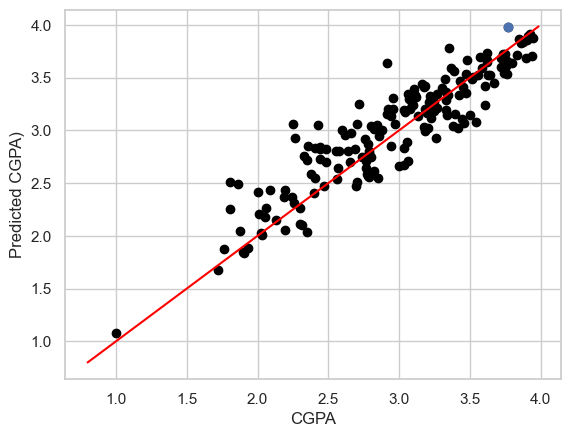

In [42]:


# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA)')
plt.plot([df["CGPA"].min(), df["CGPA"].max()], [df["CGPA"].min(), df["CGPA"].max()], color='red')
plt.show()
     


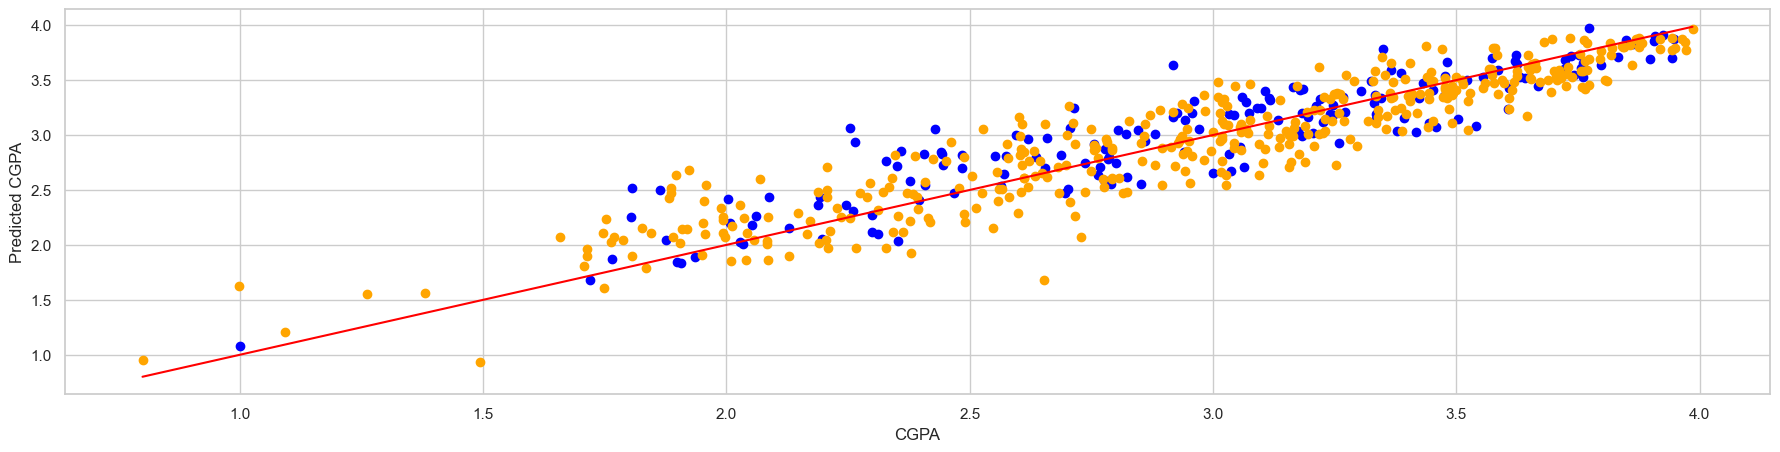

In [43]:


plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()
     



Model 2: Predict final CGPA based on GPs of first two years.

In [44]:
# Input data
labels = df['CGPA'].values
features = df[list(model2_columns)].values

In [45]:


# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
     


In [46]:


# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_2 = linear_model.LinearRegression()

# Train the Model
lr_2.fit(X_train, y_train)
     


LinearRegression()

In [47]:

# Predict


# Predict for training set
y_train_predict = lr_2.predict(X_train)

# Predict for training set
y_test_predict = lr_2.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_2.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.17375697986470875
MAE is 0.11977276769857083
---------------------------------------
The model performance for testing set
RMSE is 0.21966377563228012
MAE is 0.1367775941068821
---------------------------------------
The score of model for testing set
Test score 0.87


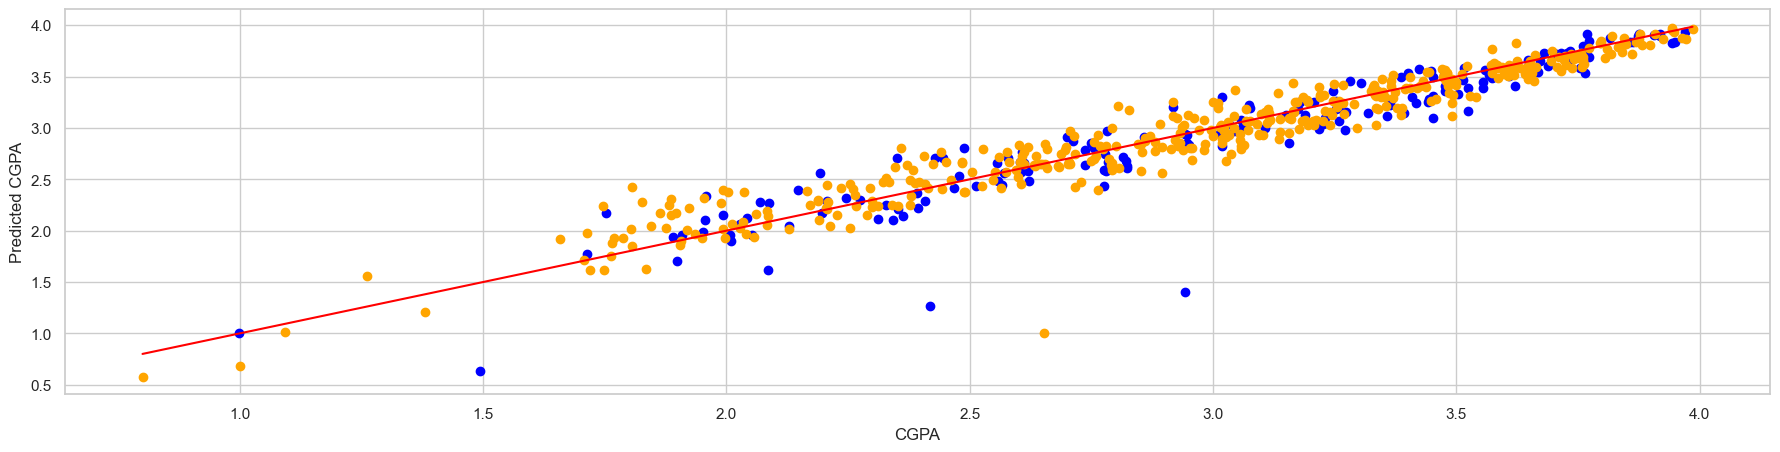

In [49]:


plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()
     



Model 3: Predict final CGPA based on GPs of first three years.

In [50]:


# Input data
labels = df['CGPA'].values
features = df[list(model3_columns)].values
     


In [51]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
     

In [52]:


# Build a Model

from sklearn import linear_model

# Bulid a new Model
lr_3 = linear_model.LinearRegression()

# Train the Model
lr_3.fit(X_train, y_train)
     


LinearRegression()

In [53]:


# Predict


# Predict for training set
y_train_predict = lr_3.predict(X_train)

# Predict for training set
y_test_predict = lr_3.predict(X_test)
     


In [54]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= lr_3.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 0.13489287286420815
MAE is 0.08727437993181908
---------------------------------------
The model performance for testing set
RMSE is 0.1655793845907609
MAE is 0.09560284858364157
---------------------------------------
The score of model for testing set
Test score 0.92


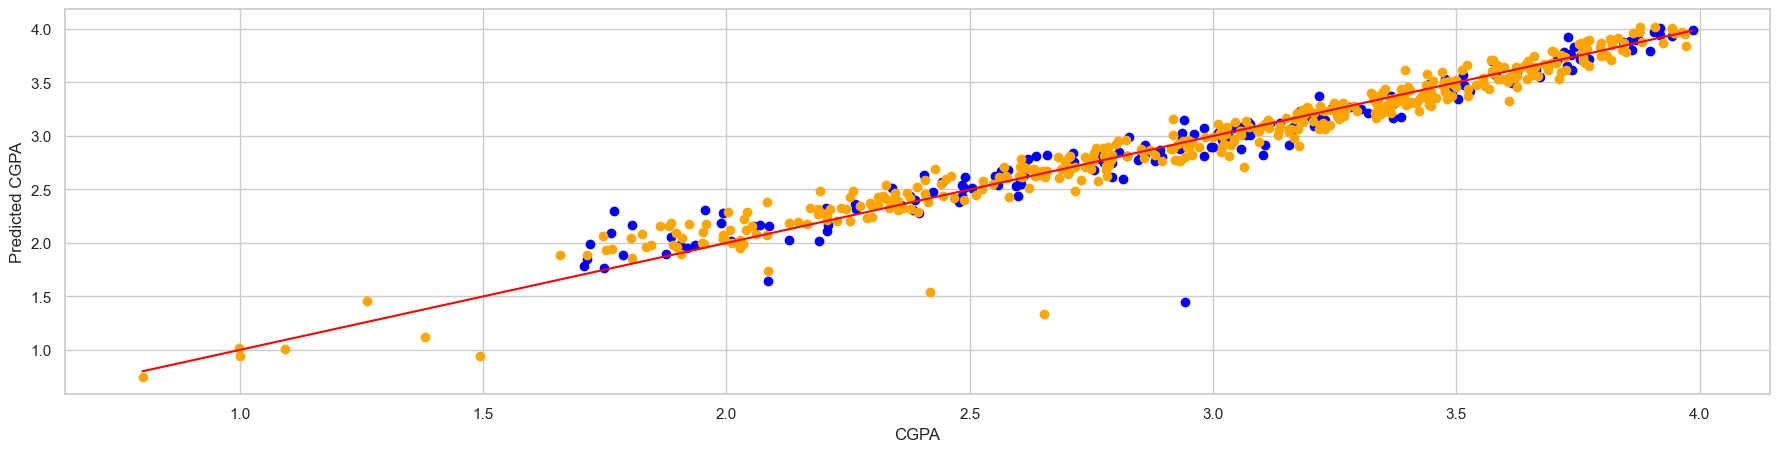

In [55]:


plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['CGPA'].min(), df['CGPA'].max()], [df['CGPA'].min(), df['CGPA'].max()], color='red')
plt.xlabel('CGPA')
plt.ylabel('Predicted CGPA')
plt.show()
     



Prepare the data for Random Forest:
Model 1: Predict final CGPA based on GPs of first year only.

In [56]:


# Input data
labels = df['CGPA'].values
features = df[list(model1_columns)].values
     


In [57]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
     


In [58]:


from sklearn.ensemble import RandomForestRegressor

rf_1 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_1.fit(X_train, y_train)
y_pred = rf_1.predict(X_test)
     


In [59]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_1.score(X_test, y_test))


Mean Absolute Error: 0.1996652173913044
Mean Squared Error: 0.06541855717391307
Root Mean Squared Error: 0.2557705166236192
The score of model for testing set 0.8118908732265


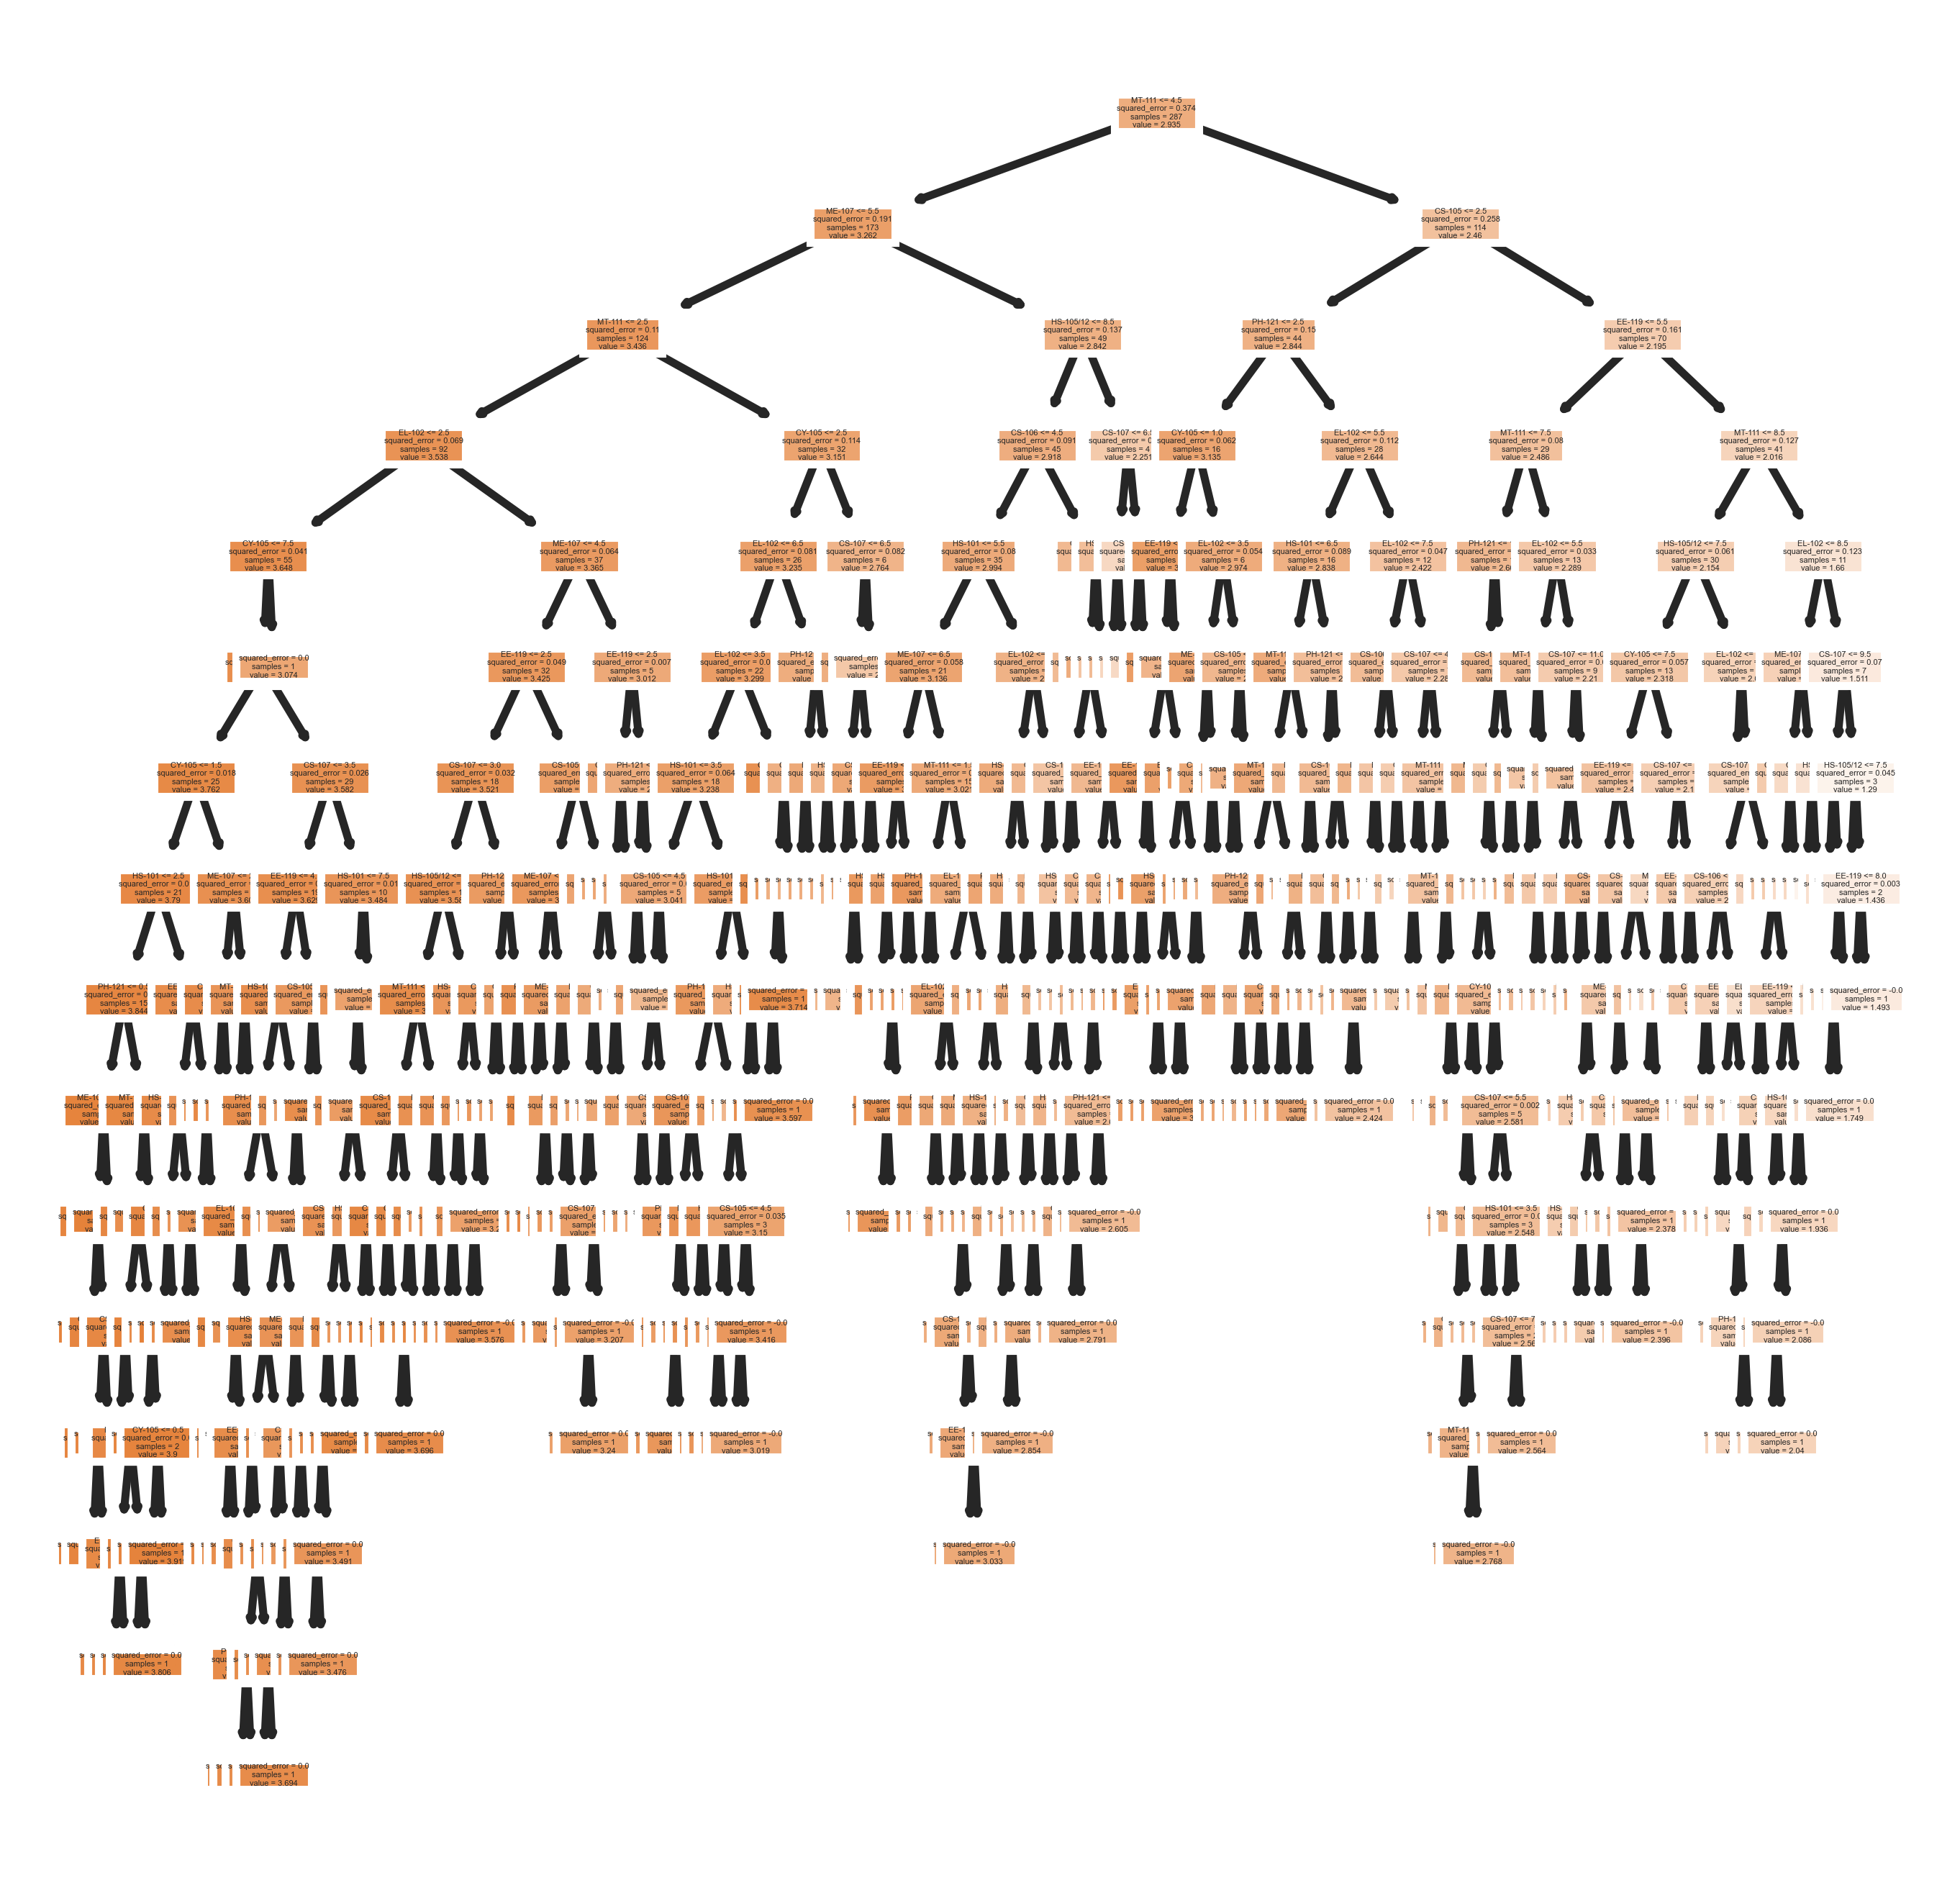

In [60]:
from sklearn import tree
fn=model1_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_1.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

Model 2: Predict final CGPA based on GPs of first two years.

In [61]:

# Input data
labels = df['CGPA'].values
features = df[list(model2_columns)].values

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [63]:


from sklearn.ensemble import RandomForestRegressor

rf_2 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_2.fit(X_train, y_train)
y_pred = rf_2.predict(X_test)
     


In [64]:

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_2.score(X_test, y_test))

Mean Absolute Error: 0.12910173913043485
Mean Squared Error: 0.03256979130434785
Root Mean Squared Error: 0.18047102621847047
The score of model for testing set 0.9063465281698518


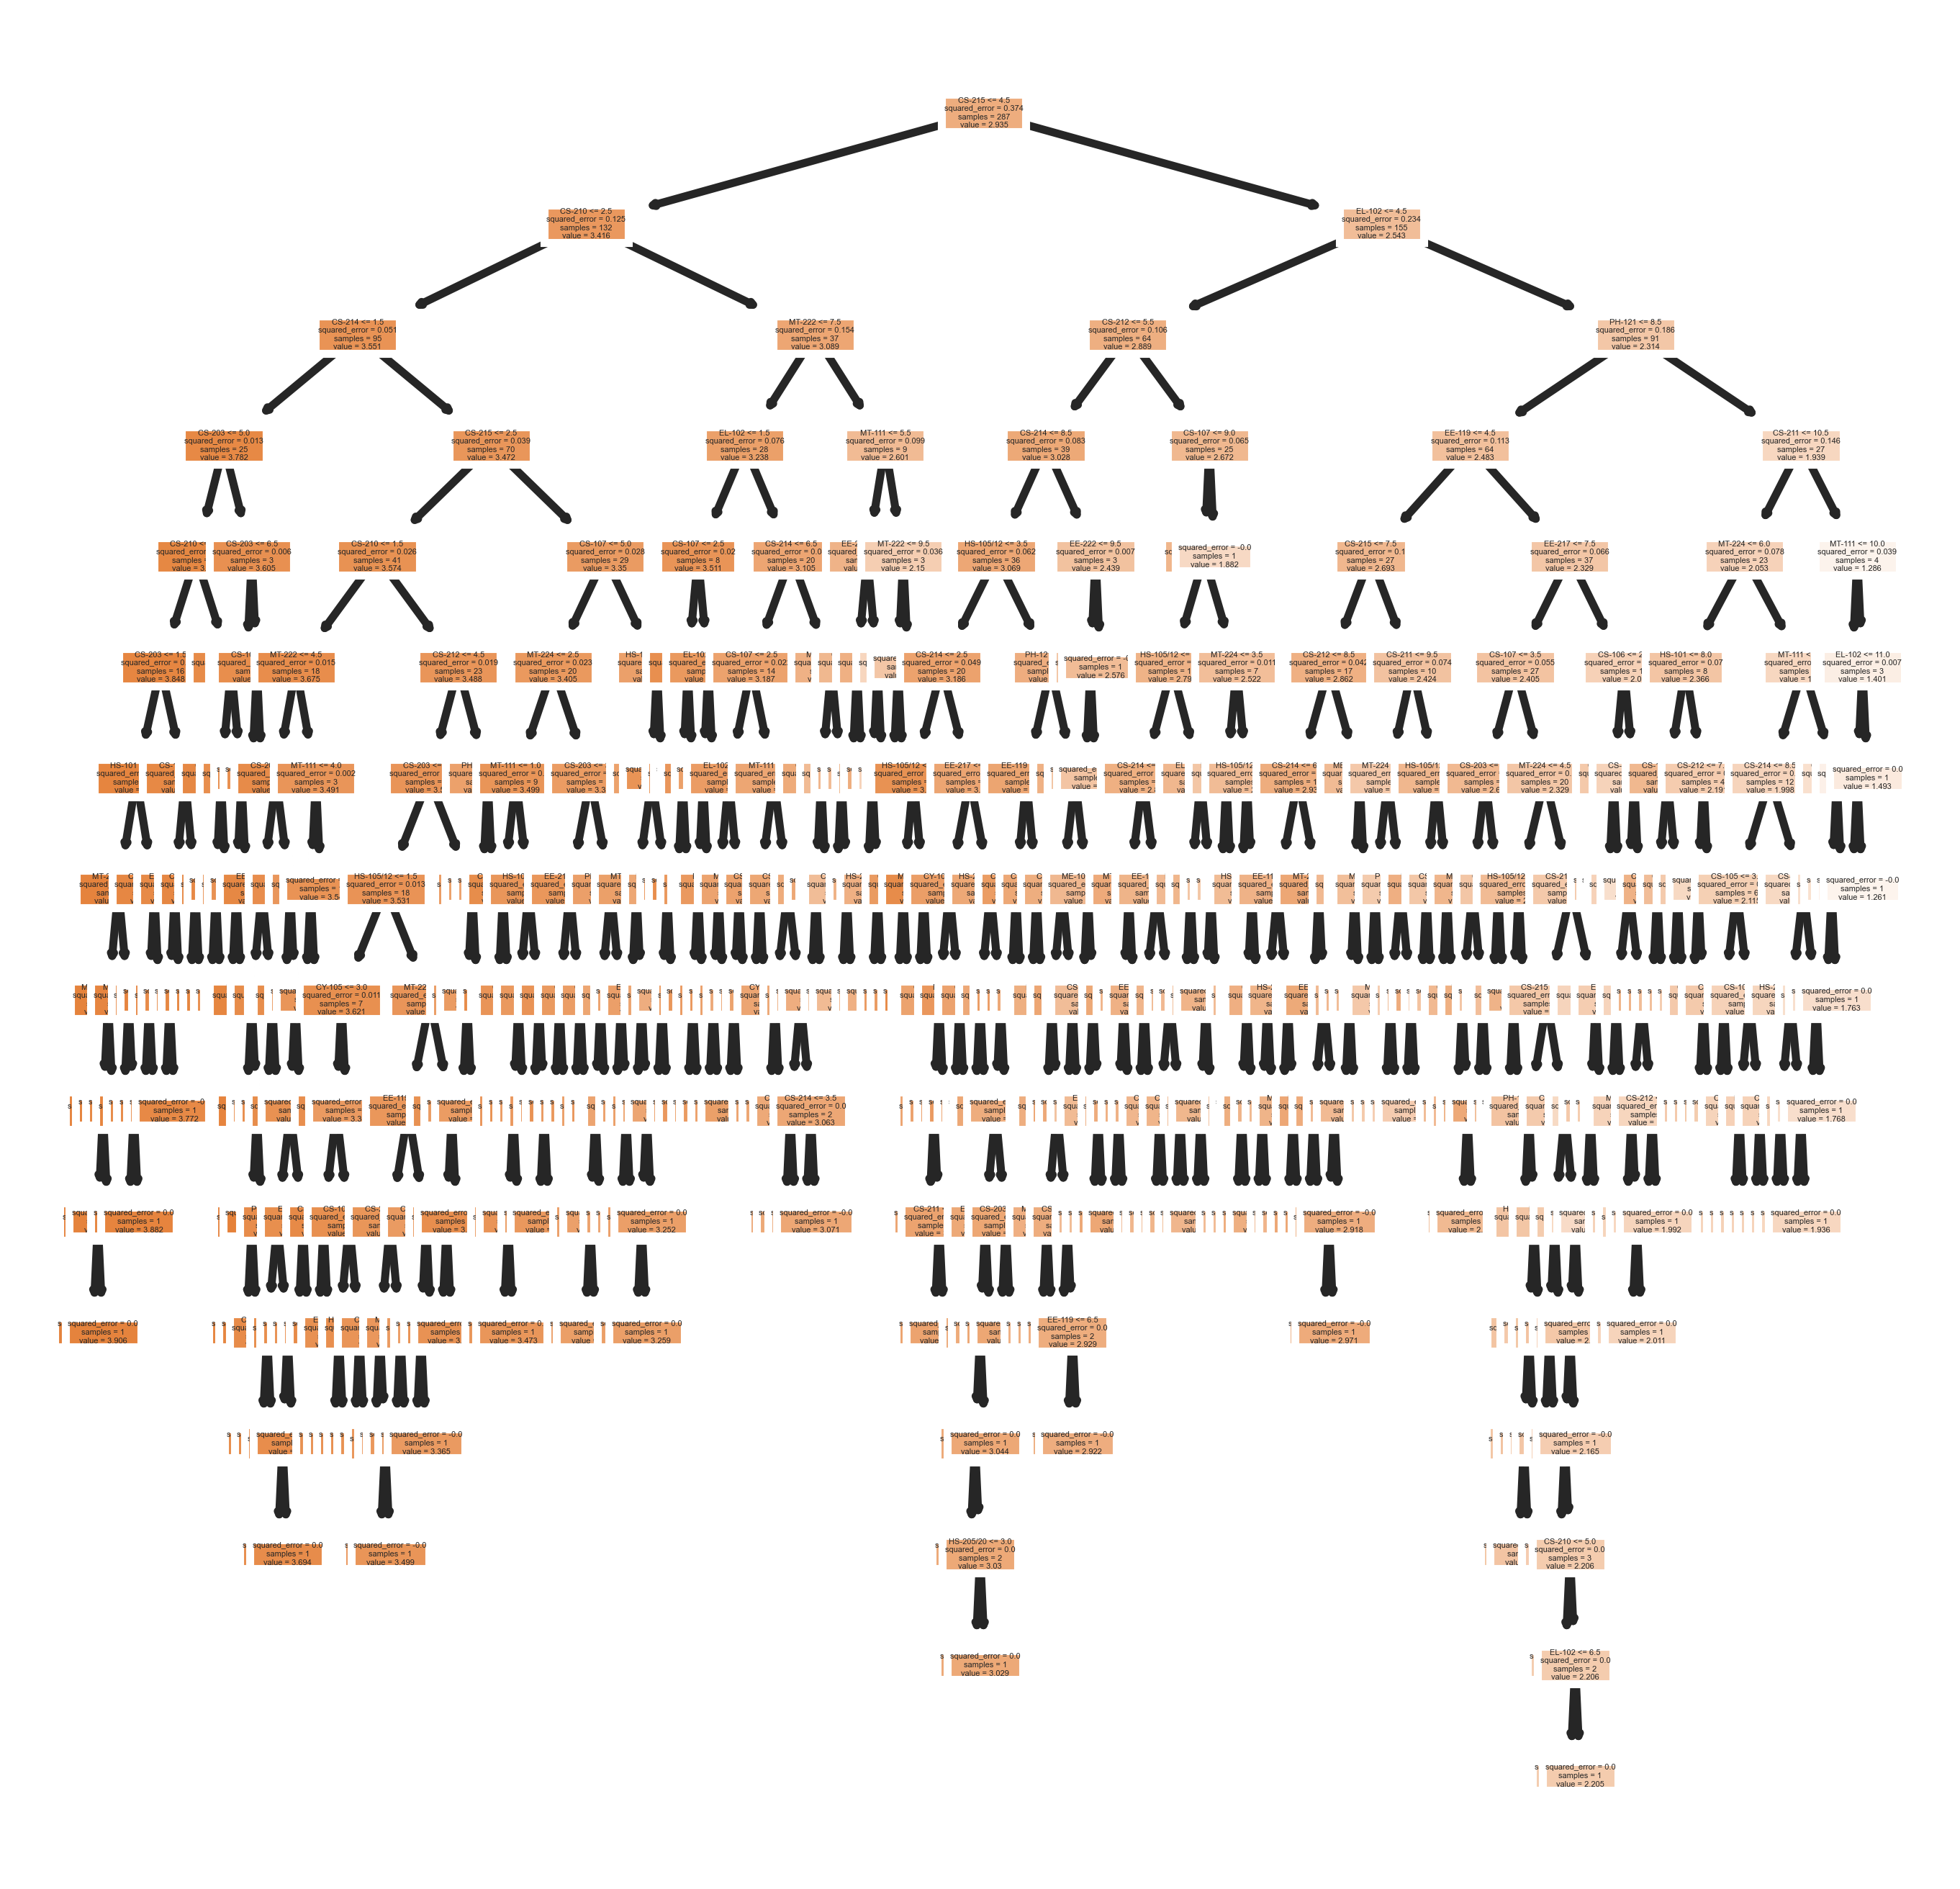

In [65]:


from sklearn import tree
fn=model2_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_2.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_model2_individualtree.png')
     



Model 3: Predict final CGPA based on GPs of first three years.

In [66]:
# Input data
labels = df['CGPA'].values
features = df[list(model3_columns)].values

In [67]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)
     


In [68]:


from sklearn.ensemble import RandomForestRegressor

rf_3 = RandomForestRegressor(n_estimators=20, random_state=0)
rf_3.fit(X_train, y_train)
y_pred = rf_3.predict(X_test)
     


In [69]:


from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The score of model for testing set",rf_3.score(X_test, y_test))
     


Mean Absolute Error: 0.10498391304347823
Mean Squared Error: 0.021266504282608695
Root Mean Squared Error: 0.14583039560602137
The score of model for testing set 0.9388487957707257


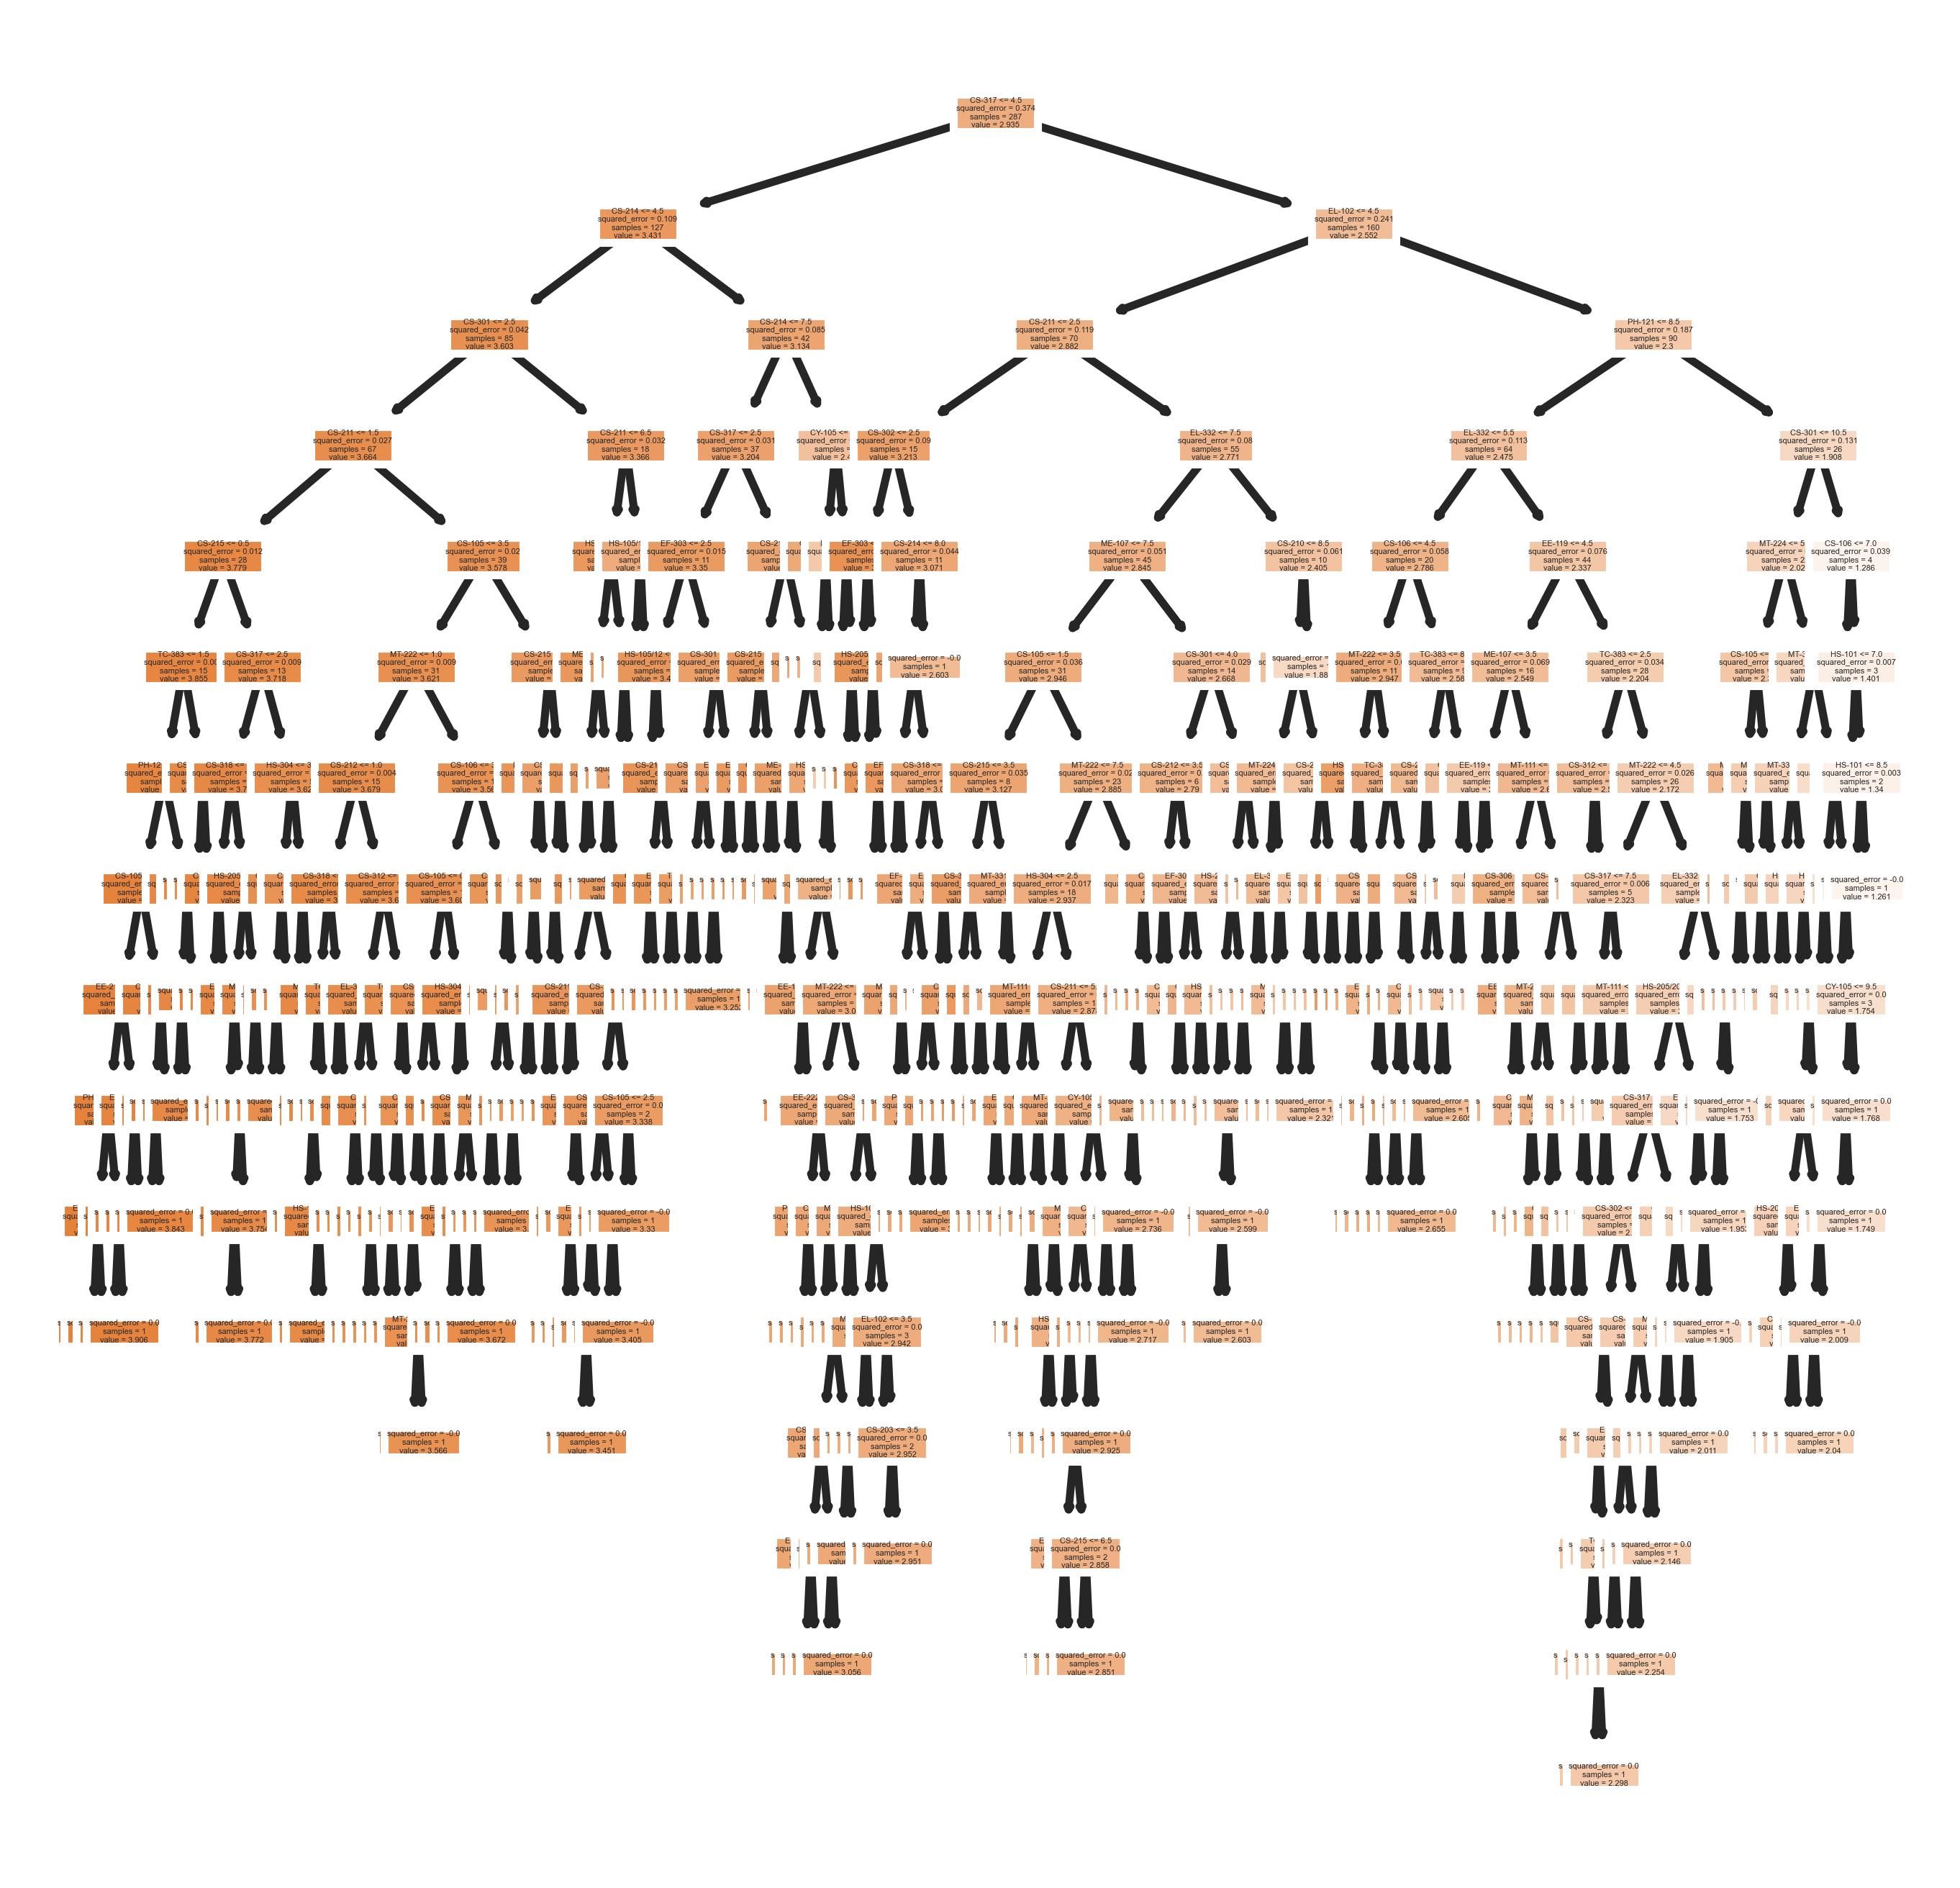

In [70]:


from sklearn import tree
fn=model3_columns
cn="CGPA"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_3.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_model3_individualtree.png')
     


In [ ]:
del input

In [ ]:
print("-----------------------------------------------------------")
print("-------------Hello from GPA Predictor----------------------")
print("-----------------------------------------------------------")
model_1=[]
model_2=[]
model_3=[]
input_lr=[]
name = input ("What is your name? ")
model = int(input ("From which model would you like to predict your GPA ? "))
if model == 1:
  for val in model1_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_1.append(grades_enc[GPA])
     else:
       model_1.append(0)
  input_lr.append(model_1)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is :{lr_1.predict(input_lr)}")
  print(f"{name}, your predictive CGPA according to Random Forest Algorithm is : {rf_1.predict(input_lr)}")
elif model == 2:
  for val in model2_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_2.append(grades_enc[GPA])
     else:
       model_2.append(0)

  input_lr.append(model_2)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is :{lr_2.predict(input_lr)}" )
  print(f"{name}, Your predictive CGPA according to Random Forest Algorithm is :{rf_2.predict(input_lr)}" )
elif model == 3:
  for val in model3_columns:
     string = "Enter your "+ val +" GPA : "
     GPA = input (string)
     if GPA in grades_enc.keys():
        model_3.append(grades_enc[GPA])
     else:
       model_3.append(0)
  input_lr.append(model_3)
  print(f"{name}, your predictive CGPA according to Linear Regression Algorithm is : {lr_3.predict(input_lr)}")
  print(f"{name}, your predictive CGPA according to Random Forest Algorithm is : {rf_3.predict(input_lr)}" )
else:
   print("Kindly enter valid value")

print("Have a nice day !!")



In [ ]:
import joblib
joblib.dump(rf_3,'student_grade_predictor.pkl')

In [72]:
# Prediction
prediction = rf_3.predict(X_test)

In [73]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

Predicted Values  Actual Values
0           3.23945          3.174
1           2.48615          2.488
2           3.16440          3.167
3           3.13440          3.068
4           3.40090          3.389